The accuracy score of K-Mean:  0.09333333333333334
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]
The accuracy score of EM:  0.0
The Confusion matrix of EM:  [[ 0 50  0]
 [ 5  0 45]
 [50  0  0]]


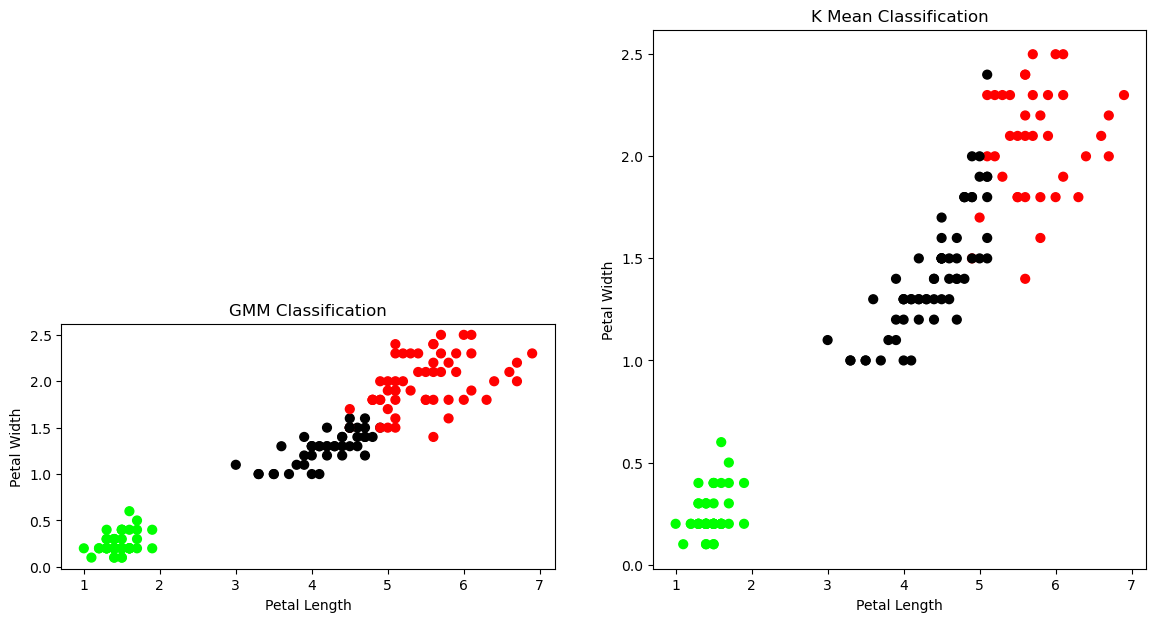

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)


plt.figure(figsize=(14,7))

colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))


from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
#xs.sample(5)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)
#y_cluster_gmm

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets

iris=datasets.load_iris()

x = iris.data
y = iris.target

print ('sepal-length', 'sepal-width', 'petal-length', 'petal-width')
print(x)
print('class: 0-Iris-Setosa, 1- Iris-Versicolour, 2- Iris-Virginica')
print(y)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

#To Training the model and Nearest nighbors K=5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

#To make predictions on our test data
y_pred=classifier.predict(x_test)

print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred)) 

sepal-length sepal-width petal-length petal-width
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\Admin\AppData\Local\Temp\ipykernel_12760\2773174117.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


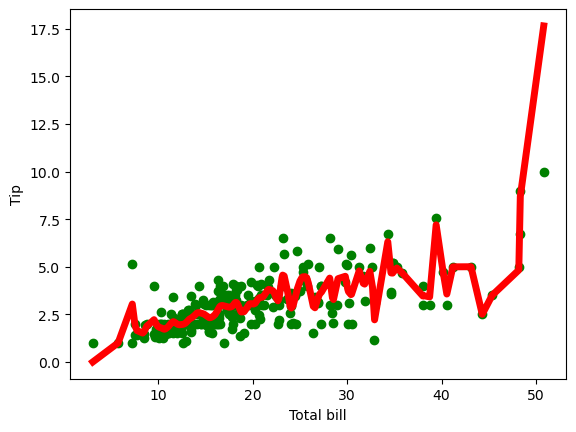

In [3]:
from numpy import *
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np1
import numpy.linalg as np
from scipy.stats.stats import pearsonr
 
def kernel(point,xmat, k):
    m,n = np1.shape(xmat)
    weights = np1.mat(np1.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2))
    return weights
 
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
     
def localWeightRegression(xmat,ymat,k):
    m,n = np1.shape(xmat)
    ypred = np1.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
       
# load data points
data = pd.read_csv('tips.csv')
bill = np1.array(data.total_bill)
tip = np1.array(data.tip)
 
#preparing and add 1 in bill
mbill = np1.mat(bill)
mtip = np1.mat(tip) # mat is used to convert to n dimesiona to 2 dimensional array form
m= np1.shape(mbill)[1]
# print(m) 244 data is stored in m
one = np1.mat(np1.ones(m)) 
X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE
#print(X)
#set k here
ypred = localWeightRegression(X,mtip,0.3) 
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
     
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();

In [4]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook

def local_regression(x0, X, Y, tau):# add bias term
 x0 = np.r_[1, x0] # Add one to avoid the loss in information
 X = np.c_[np.ones(len(X)), X]

 # fit model: normal equations with kernel
 xw = X.T * radial_kernel(x0, X, tau) # XTranspose * W

 beta = np.linalg.pinv(xw @ X) @ xw @ Y #@ Matrix Multiplication or Dot Product


 # predict value
 return x0 @ beta # @ Matrix Multiplication or Dot Product for prediction
def radial_kernel(x0, X, tau):
 return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))
# Weight or Radial Kernal Bias Function

n = 1000
# generate dataset
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y :\n",Y[1:10])
# jitter X
X += np.random.normal(scale=.1, size=n)
print("Normalised (10 Samples) X :\n",X[1:10])

domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples) :\n",domain[1:10])
def plot_lwr(tau):
 # prediction through regression
 prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
 plot = figure(plot_width=400, plot_height=400)
 plot.title.text='tau=%g' % tau
 plot.scatter(X, Y, alpha=.3)
 plot.line(domain, prediction, line_width=2, color='red')
 return plot

show(gridplot([
 [plot_lwr(10.), plot_lwr(1.)],
 [plot_lwr(0.1), plot_lwr(0.01)]]))

The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y :
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-3.03187678 -3.02554639 -2.87079506 -3.00124913 -3.05897337 -3.05947017
 -3.05347898 -2.96767596 -2.85119317]
 Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
     

In [6]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)

plt.figure(figsize=(14,7))

colormap = np.array(['red', 'lime', 'black'])

<Figure size 1400x700 with 0 Axes>

Text(0, 0.5, 'Petal Width')

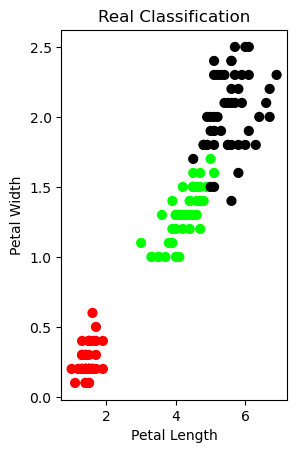

In [7]:
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


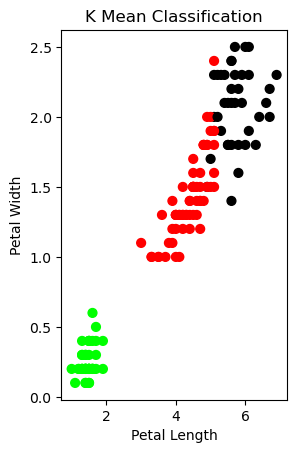

In [8]:
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))

The accuracy score of EM:  0.36666666666666664
The Confusion matrix of EM:  [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]


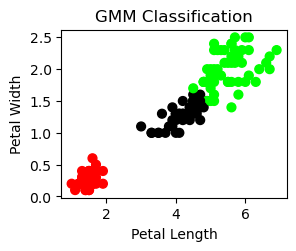

In [9]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
#xs.sample(5)

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)
#y_cluster_gmm

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))